### q3
Assume a linear model and then add $0$-mean Gaussian noise to generate a sample. Divide your sample into two as training and validation sets. Use linear regression using the training half. Compute error on the validation set. Do the same for polynomials of degrees 2 and 3 as well. 

In [3]:
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from random import shuffle
# generate data with a linear model
x = np.arange(0, 1000, 0.1)
shuffle(x)
y = 4*x + 3
# add Gaussian noise, noise~(N(0, 10))
y += np.random.normal(0, 10, len(x))

# train-validate split, 60% for training, 40% for validating
train_x = x[:int(len(x)*0.6)]
train_y = y[:int(len(y)*0.6)]
valid_x = x[int(len(x)*0.6):]
valid_y = y[int(len(y)*0.6):]

# train a linear model
model = LinearRegression()
model.fit(train_x.reshape(-1,1), train_y)
error_train_1 = np.mean((model.predict(train_x.reshape(-1,1)) - train_y)**2)
print(f'Train Error (linear): {error_train_1}')
y_pred = model.predict(valid_x.reshape(-1,1))
error_test_1 = np.mean((y_pred - valid_y)**2)
print(f'Validation Error (linear): {error_test_1}')

# train a polynomial model (degree = 2)
poly = PolynomialFeatures(degree=2)
train_x_poly = poly.fit_transform(train_x.reshape(-1,1))
valid_x_poly = poly.fit_transform(valid_x.reshape(-1,1))
model2 = LinearRegression()
model2.fit(train_x_poly, train_y)
error_train_2 = np.mean((model2.predict(train_x_poly) - train_y)**2)
print(f'\nTrain Error (polynomial, degree=2): {error_train_2}')
y_pred_2 = model2.predict(valid_x_poly)
error_test_2 = np.mean((y_pred_2 - valid_y)**2)
print(f'Validation Error (polynomial, degree=2): {error_test_2}')

# train a polynomial model (degree = 3)
poly3 = PolynomialFeatures(degree=3)
train_x_poly3 = poly3.fit_transform(train_x.reshape(-1,1))
valid_x_poly3 = poly3.fit_transform(valid_x.reshape(-1,1))
model3 = LinearRegression()
model3.fit(train_x_poly3, train_y)
error_train_3 = np.mean((model3.predict(train_x_poly3) - train_y)**2)
print(f'\nTrain Error (polynomial, degree=3): {error_train_3}')
y_pred_3 = model3.predict(valid_x_poly3)
error_test_3 = np.mean((y_pred_3 - valid_y)**2)
print(f'Validation Error (polynomial, degree=3): {error_test_3}')

Train Error (linear): 96.67827524619423
Validation Error (linear): 101.42404079067494

Train Error (polynomial, degree=2): 96.67191905603174
Validation Error (polynomial, degree=2): 101.4190143221822

Train Error (polynomial, degree=3): 96.66804221932625
Validation Error (polynomial, degree=3): 101.40958949504495


### q4 (Ch4 Ex 8)
When the training set is small, the contribution of variance to error may be more than that of bias and in such a case, we may prefer a simple model even though we know that it is too simple for the task. Can you give an example?

In [10]:
# estimate the bias and variance for a regression model
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from mlxtend.evaluate import bias_variance_decomp
import matplotlib.pyplot as plt
import numpy as np

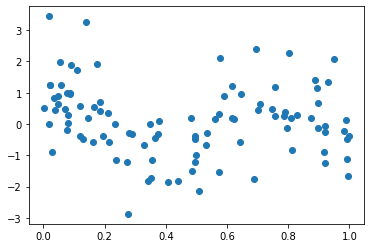

In [38]:
# build dataset
def f(x):
    # define a cubic function
    return np.cos(8*x)
    
# generate inputs
x = np.sort(np.random.rand(100))
# generate outputs with noise
y = f(x) + np.random.normal(0, 1, len(x))
# train-test split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.6)
# plot
plt.scatter(x, y)

Linear Model: MSE=1.5669434536348308, Bias=1.518076398684788, Variance=0.04886705495004258


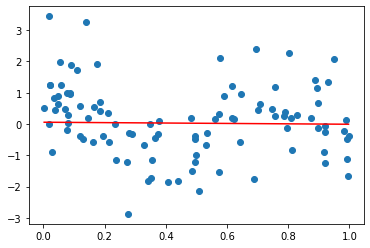

In [39]:
# define a linear model
model = LinearRegression()
# fit the model
model.fit(x_train.reshape(-1,1), y_train)
# predict
y_pred = model.predict(x_test.reshape(-1,1))
# plot
a, b = np.polyfit(x_train, y_train, 1)
plt.plot(x, a*x+b, 'r')
plt.scatter(x, y)
# estimate bias and variance
mse1, bias1, var1 = bias_variance_decomp(model, x_train.reshape(-1,1), y_train, x_test.reshape(-1,1), y_test, loss='mse', num_rounds=200, random_seed=1)
print(f'Linear Model: MSE={mse1}, Bias={bias1}, Variance={var1}')

Polynomial Model (degree=3): MSE=1.2738138968559938, Bias=1.142926532790495, Variance=0.13088736406549872


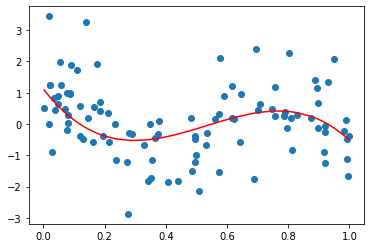

In [40]:
# define a polynomial model (degree=3)
poly = PolynomialFeatures(degree=3)
x_train_poly = poly.fit_transform(x_train.reshape(-1,1))
x_test_poly = poly.fit_transform(x_test.reshape(-1,1))
model2 = LinearRegression()
# fit the model
model2.fit(x_train_poly, y_train)
# predict
y_pred_2 = model2.predict(x_test_poly)
# plot
a, b, c, d = np.polyfit(x_train, y_train, 3)
plt.plot(x, a*x**3+b*x**2+c*x+d, 'r')
plt.scatter(x, y)
# estimate bias and variance
mse2, bias2, var2 = bias_variance_decomp(model2, x_train_poly, y_train, x_test_poly, y_test, loss='mse', num_rounds=200, random_seed=1)
print(f'Polynomial Model (degree=3): MSE={mse2}, Bias={bias2}, Variance={var2}')

Polynomial Model (degree=5): MSE=1.7616514578414797, Bias=1.251329935823068, Variance=0.5103215220184121


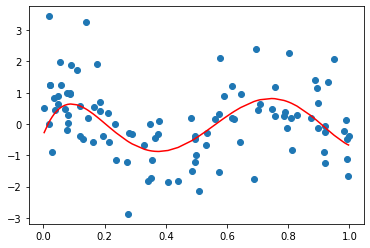

In [41]:
# define a polynomial model (degree=5)
poly = PolynomialFeatures(degree=5)
x_train_poly_5 = poly.fit_transform(x_train.reshape(-1,1))
x_test_poly_5 = poly.fit_transform(x_test.reshape(-1,1))
model3 = LinearRegression()
# fit the model
model3.fit(x_train_poly_5, y_train)
# predict
y_pred_3 = model3.predict(x_test_poly_5)
# plot
a, b, c, d, e, f = np.polyfit(x_train, y_train, 5)
plt.plot(x, a*x**5+b*x**4+c*x**3+d*x**2+e*x+f, 'r')
plt.scatter(x, y)
# estimate bias and variance
mse3, bias3, var3 = bias_variance_decomp(model3, x_train_poly_5, y_train, x_test_poly_5, y_test, loss='mse', num_rounds=200, random_seed=1)
print(f'Polynomial Model (degree=5): MSE={mse3}, Bias={bias3}, Variance={var3}')

### q5
Generate a sample from a multivariate normal density $N(\mu, \Sigma)$, calculate $m$ and $S$, and compare them with $\mu$ and $\Sigma$. Check how your estimates change as the sample size changes.

In [13]:
import matplotlib.pyplot as plt
import numpy as np

In [14]:
mean = [5, 2]
cov = np.array([[6, -3], [-3, 3.5]])
# when sample size equals to 10
sample = np.random.multivariate_normal(mean, cov, 5000)
mean1 = np.mean(sample, axis=0)
cov1 = np.cov(sample.T)
print('mean', mean1)
print('cov', cov1)

mean [4.97468859 2.02256396]
cov [[ 6.00359325 -3.05060293]
 [-3.05060293  3.50764612]]


### q6
Generate samples from two multivariate normal densities $N\sim(\mu_i, \Sigma_i)$, i = 1, 2, and calculate the Bayes’ optimal discriminant for the four cases in table 5.1. (Ch5 Ex3)

For sample 1, $\mu_1 = [1, 2]$, $\Sigma_1 = \left[ \begin{array}{ll}
        4 & 1 \\
        1 & 4
        \end{array} \right]$

For sample 2, $\mu_2 = [-3, -2 ]$, $\Sigma_2 = \left[ \begin{array}{ll}
        5 & 2 \\
        2 & 6
        \end{array} \right]$

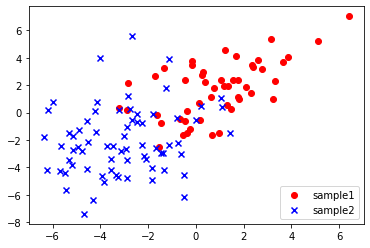

In [23]:
# generate two samples
mean1 = [1, 2]
cov1 = np.array([[3,1], [1, 4]])
n1 = 50
sample1 = np.random.multivariate_normal(mean1, cov1, n1)
mean2 = [-3, -2]
cov2 = np.array([[5, 2], [2, 6]])
n2 = 70
sample2 = np.random.multivariate_normal(mean2, cov2, n2)
# plot the samples
plt.scatter(sample1[:, 0], sample1[:, 1], c='r', marker='o', label='sample1')
plt.scatter(sample2[:, 0], sample2[:, 1], c='b', marker='x', label='sample2')
# add legend
plt.legend(loc='lower right')

In [24]:
# Calculate the estimates
PC1 = n1/(n1+n2)  # estimate prior probability of class 1
sample_mean1 = np.mean(sample1, axis=0)  # estimate mean of class 1
sample_cov1 = np.cov(sample1.T)  # estimate covariance of class 1

PC2 = n2/(n1+n2)  # estimate prior probability of class 2
sample_mean2 = np.mean(sample2, axis=0)  # estimate mean of class 2
sample_cov2 = np.cov(sample2.T)  # estimate covariance of class 2

First assumption: unequal covariance
$$
g_i(\boldsymbol{x})=\boldsymbol{x}^T \mathbf{W}_i \boldsymbol{x}+\boldsymbol{w}_i^T \boldsymbol{x}+w_{i 0}
$$
where
$$
\begin{aligned}
\mathbf{W}_i &=-\frac{1}{2} \mathbf{S}_i^{-1} \\
\boldsymbol{w}_i &=\mathbf{S}_i^{-1} \boldsymbol{m}_i \\
w_{i 0} &=-\frac{1}{2} \boldsymbol{m}_i^T \mathbf{S}_i^{-1} \boldsymbol{m}_i-\frac{1}{2} \log \left|\mathbf{S}_i\right|+\log \hat{P}\left(C_i\right)
\end{aligned}
$$

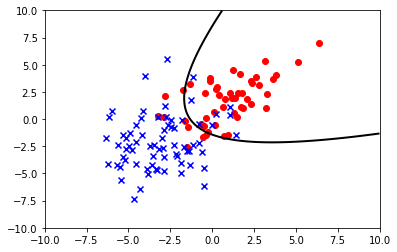

In [25]:
# calculate the discriminant function
def disc1(prior, mean, cov, x):
    W = -0.5*np.linalg.inv(cov)
    w = np.linalg.inv(cov).dot(mean)
    w0 = -0.5*mean.T.dot(np.linalg.inv(cov)).dot(mean) - 0.5*np.log(np.linalg.det(cov)) + np.log(prior)
    return x.T.dot(W).dot(x) + w.T.dot(x) + w0

# plot the decision boundary
x1 = np.linspace(-10, 10, 100)
x2 = np.linspace(-10, 10, 100)
X1, X2 = np.meshgrid(x1, x2)
X = np.c_[np.ravel(X1), np.ravel(X2)]
Z = np.array([disc1(PC1, sample_mean1, sample_cov1, x) - disc1(PC2, sample_mean2, sample_cov2, x) for x in X])
Z = Z.reshape(X1.shape)
plt.contour(X1, X2, Z, [0], colors='k', linewidths=2)
plt.scatter(sample1[:, 0], sample1[:, 1], c='r', marker='o', label='sample1')
plt.scatter(sample2[:, 0], sample2[:, 1], c='b', marker='x', label='sample2')
# plt.title('Assumption #1 Unequal Covariance')

Second assumption: equal covariance
$$
g_i(\boldsymbol{x})=\boldsymbol{w}_i^T \boldsymbol{x}+w_{i 0}
$$
where
$$
\begin{aligned}
\boldsymbol{w}_i &=\mathbf{S}^{-1} \boldsymbol{m}_i \\
w_{i 0} &=-\frac{1}{2} \boldsymbol{m}_i^T \mathbf{S}^{-1} \boldsymbol{m}_i+\log \hat{P}\left(C_i\right)
\end{aligned}
$$

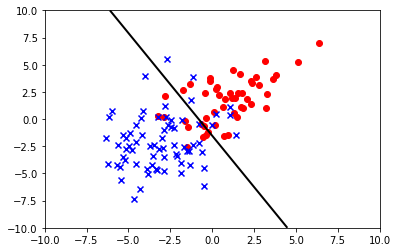

In [26]:
# estimate the common covariance
sample_cov = (n1*sample_cov1 + n2*sample_cov2)/(n1+n2)
# calculate the discriminant function
def disc2(prior, mean, cov, x):
    w = np.linalg.inv(cov).dot(mean)
    w0 = -0.5*mean.T.dot(np.linalg.inv(cov)).dot(mean) + np.log(prior)
    return w.T.dot(x)+w0

# plot the decision boundary
x1 = np.linspace(-10, 10, 100)
x2 = np.linspace(-10, 10, 100)
X1, X2 = np.meshgrid(x1, x2)
X = np.c_[np.ravel(X1), np.ravel(X2)]
Z = np.array([disc2(PC1, sample_mean1, sample_cov, x) - disc2(PC2, sample_mean2, sample_cov, x) for x in X])
Z = Z.reshape(X1.shape)
plt.contour(X1, X2, Z, [0], colors='k', linewidths=2)
plt.scatter(sample1[:, 0], sample1[:, 1], c='r', marker='o', label='sample1')
plt.scatter(sample2[:, 0], sample2[:, 1], c='b', marker='x', label='sample2')
# plt.title('Assumption #2 Equal Covariance')

Third assumption:

Assume independence between variables

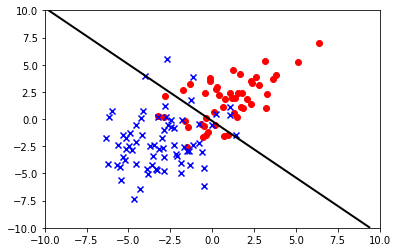

In [27]:
# calculate the variance
var1 = np.trace(sample_cov1)
var2 = np.trace(sample_cov2)
sample_var = (n1*var1 + n2*var2)/(n1+n2)
# calculate the discriminant function
def disc3(prior, mean, var, x):
    return -0.5*(x-mean/var**0.5).dot((x-mean/var**0.5).T)+np.log(prior)

# plot the decision boundary
x1 = np.linspace(-10, 10, 100)
x2 = np.linspace(-10, 10, 100)
X1, X2 = np.meshgrid(x1, x2)
X = np.c_[np.ravel(X1), np.ravel(X2)]
Z = np.array([disc3(PC1, sample_mean1, sample_var, x) - disc3(PC2, sample_mean2, sample_var, x) for x in X])
Z = Z.reshape(X1.shape)
plt.contour(X1, X2, Z, [0], colors='k', linewidths=2)
plt.scatter(sample1[:, 0], sample1[:, 1], c='r', marker='o', label='sample1')
plt.scatter(sample2[:, 0], sample2[:, 1], c='b', marker='x', label='sample2')
# plt.title('Assumption #3 Independence')

Assumption 4

Equal variances
$$
g_i(\boldsymbol{x})=-\frac{\left\|\boldsymbol{x}-\boldsymbol{m}_i\right\|^2}{2 s^2}+\log \hat{P}\left(C_i\right)
$$

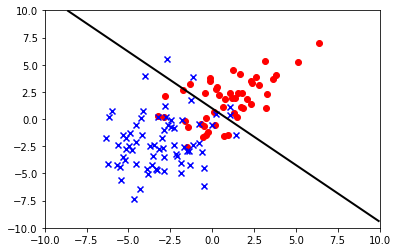

In [28]:
# estimate the common variance
common_var = np.var(np.r_[sample1, sample2], axis=0).mean()
# calculate the discriminant function
def disc4(prior, mean, var, x):
    return -0.5*(1/var)*(x-mean).dot((x-mean/var).T)+np.log(prior)
# plot the decision boundary
x1 = np.linspace(-10, 10, 100)
x2 = np.linspace(-10, 10, 100)
X1, X2 = np.meshgrid(x1, x2)
X = np.c_[np.ravel(X1), np.ravel(X2)]
Z = np.array([disc4(PC1, sample_mean1, common_var, x) - disc4(PC2, sample_mean2, common_var, x) for x in X])
Z = Z.reshape(X1.shape)
plt.contour(X1, X2, Z, [0], colors='k', linewidths=2)
plt.scatter(sample1[:, 0], sample1[:, 1], c='r', marker='o', label='sample1')
plt.scatter(sample2[:, 0], sample2[:, 1], c='b', marker='x', label='sample2')
# plt.title('Assumption #4 Common Variance')